In [10]:
import os
import json
import pandas as pd

# Define the dataset root path
data_path = "dataset"

# Define the path to the aspect data folder
aspect_data_path = os.path.join(data_path, "aspect_data")


In [11]:
# Define the path to the aspect data file (correct extension .jsonl)
aspect_file_path = os.path.join(aspect_data_path, "review_with_aspect.jsonl")

# Load aspect data from JSONL file
aspect_data = []
with open(aspect_file_path, "r", encoding="utf-8") as f:
    for line in f:
        aspect_data.append(json.loads(line))

# Print basic information
print("Number of records in aspect data:", len(aspect_data))
print("\nExample record:")
print(aspect_data[0])

Number of records in aspect data: 25986

Example record:
{'id': 'ICLR_2020_1123', 'text': "This work studies the predictive uncertainty issue of deep learning models . In particular , this work focuses on the distributional uncertainty which is caused by distributional mismatch between training and test examples . The proposed method is developed based on the existing work called Dirichlet Prior Network ( DPN ) . It aims to address the issue of DPN that its loss function is complicated and makes the optimization difficult . Instead , this paper proposes a new loss function for DPN , which consists of the commonly used cross-entropy loss term and a regularization term . Two loss functions are respectively defined over in-domain training examples and out-of-distribution ( OOD ) training examples . The final objective function is a weighted combination of the two loss functions . Experimental study is conducted on one synthetic dataset and two image datasets ( CIFAR-10 and CIFAR-100 ) to 

In [12]:
from collections import Counter

# Collect all aspect labels
all_labels = []
for record in aspect_data:
    for label in record["labels"]:
        all_labels.append(label[2])  # label[2] is the aspect name

# Count the frequency of each aspect label
label_counter = Counter(all_labels)

# Display aspect label distribution
print("Aspect label distribution:")
for label, count in label_counter.items():
    print(f"{label}: {count}")


Aspect label distribution:
summary: 23946
motivation_positive: 11121
clarity_positive: 13095
soundness_negative: 15662
substance_negative: 11717
meaningful_comparison_negative: 9242
soundness_positive: 12780
clarity_negative: 15697
originality_negative: 8745
originality_positive: 11606
replicability_negative: 4548
substance_positive: 4669
meaningful_comparison_positive: 1488
replicability_positive: 271
motivation_negative: 3499


In [13]:
# Collect all submission IDs
submission_ids = [record["id"] for record in aspect_data]

# Find the number of unique submissions
unique_submissions = set(submission_ids)

print("Total number of reviews:", len(submission_ids))
print("Total number of unique submissions:", len(unique_submissions))


Total number of reviews: 25986
Total number of unique submissions: 8742


### Interpretation of Results

The dataset contains 8,742 unique submissions (papers).  
Across these submissions, there are a total of 25,986 review snippets available.

This implies that, on average, there are approximately 3 review snippets per submission (25986 ÷ 8742 ≈ 2.97).

This finding is particularly important for two reasons:
- **Retrieval phase:** When retrieving past review information for a given submission, there is a relatively large pool of examples available, enhancing the retrieval quality.
- **Model training:** During the model training phase, each submission can be associated with multiple review examples, which could lead to richer and more informed decision-making during the accept/reject prediction task.


In [14]:
# Calculate character and word lengths of each review
char_lengths = [len(record["text"]) for record in aspect_data]
word_lengths = [len(record["text"].split()) for record in aspect_data]

# Calculate averages
avg_char_length = sum(char_lengths) / len(char_lengths)
avg_word_length = sum(word_lengths) / len(word_lengths)

print(f"Average review length (in characters): {avg_char_length:.2f}")
print(f"Average review length (in words): {avg_word_length:.2f}")


Average review length (in characters): 2319.60
Average review length (in words): 419.81


### Review Length Analysis

The average length of a review snippet is approximately **2,319.60 characters** and **419.81 words**.

This suggests that the peer reviews are generally rich and detailed.  
Such length ensures that during retrieval, the model will have access to informative and contextually rich snippets.  
However, the relatively long sequence length should be considered when designing the model architecture, especially if sequence length limitations (e.g., in transformer models) are a factor.


In [15]:
# Check for missing (null) fields in aspect_data
missing_id = sum([1 for record in aspect_data if not record.get("id")])
missing_text = sum([1 for record in aspect_data if not record.get("text")])
missing_labels = sum([1 for record in aspect_data if "labels" not in record])

print(f"Missing 'id' fields: {missing_id}")
print(f"Missing 'text' fields: {missing_text}")
print(f"Missing 'labels' fields: {missing_labels}")


Missing 'id' fields: 0
Missing 'text' fields: 0
Missing 'labels' fields: 0


There is no missing data.

In [16]:
import numpy as np

char_lengths = [len(record["text"]) for record in aspect_data]
word_lengths = [len(record["text"].split()) for record in aspect_data]

# Character statistics
avg_char_length = np.mean(char_lengths)
min_char_length = np.min(char_lengths)
max_char_length = np.max(char_lengths)
std_char_length = np.std(char_lengths)

# Word statistics
avg_word_length = np.mean(word_lengths)
min_word_length = np.min(word_lengths)
max_word_length = np.max(word_lengths)
std_word_length = np.std(word_lengths)

print(f"Character Length - Avg: {avg_char_length:.2f}, Min: {min_char_length}, Max: {max_char_length}, Std: {std_char_length:.2f}")
print(f"Word Length - Avg: {avg_word_length:.2f}, Min: {min_word_length}, Max: {max_word_length}, Std: {std_word_length:.2f}")


Character Length - Avg: 2319.60, Min: 99, Max: 6915, Std: 1192.90
Word Length - Avg: 419.81, Min: 16, Max: 1370, Std: 222.62


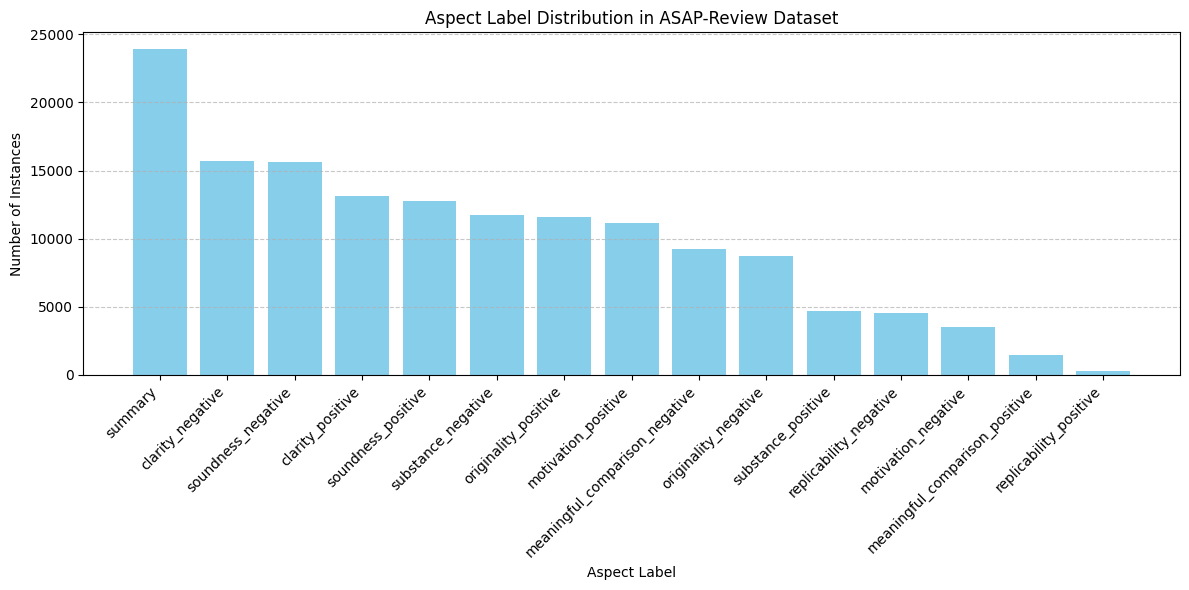

In [20]:
import matplotlib.pyplot as plt

# Plot aspect label distribution
plt.figure(figsize=(12, 6))
plt.bar(aspect_df["Aspect Label"], aspect_df["Count"], color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.title("Aspect Label Distribution in ASAP-Review Dataset")
plt.xlabel("Aspect Label")
plt.ylabel("Number of Instances")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
